<a href="https://colab.research.google.com/github/kayrocsilva/P1_Machine_Learning/blob/main/Neuronio_analise_balance_sheet_ibm_kayro_felipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Conteiner*

## Importação Bibliotecas

In [40]:
!pip install plotly --upgrade
!pip install squarify --upgrade
!pip -q install yellowbrick
!pip -q install shap
!pip -q install scikit-plot

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from math import pi

## Importação do arquivo pkl no drive

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
with open('/content/drive/MyDrive/am5t2/pickle/indicadores_kayro_felipe.pkl', 'rb') as f:
  X_train_scaled_q, y_train_q, X_test_scaled_q, y_test_q = pickle.load(f)

## Treinamento com algoritmo GaussianNB

In [44]:
# Instanciar e treinar o modelo com dados trimestrais(q)
nb_model = GaussianNB()
nb_model.fit(X_train_scaled_q, y_train_q)

# Fazer previsões
y_pred = nb_model.predict(X_test_scaled_q)

# Probabilidades por classe
y_pred_proba = nb_model.predict_proba(X_test_scaled_q)

## Avaliação com classification_report e matriz de confusão


Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

     Crítica       0.67      1.00      0.80        10
        Ruim       1.00      0.29      0.44         7

    accuracy                           0.71        17
   macro avg       0.83      0.64      0.62        17
weighted avg       0.80      0.71      0.65        17


Acurácia do Modelo: 70.59%


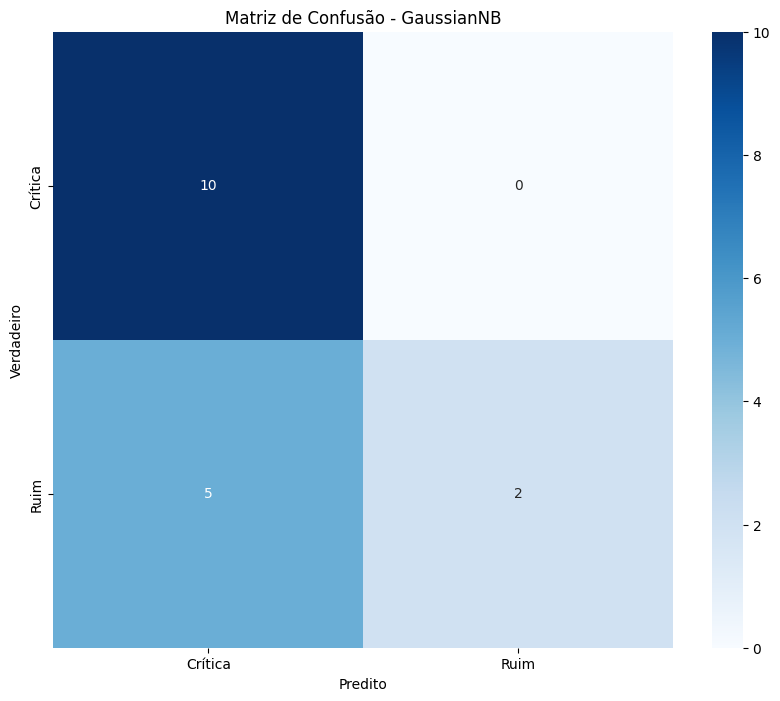

In [45]:
# Avaliação do modelo utilizando dados trimestrais(q)
print("\nRelatório de Classificação Detalhado:")
print(classification_report(y_test_q, y_pred, target_names=nb_model.classes_))

print("\nAcurácia do Modelo: {:.2f}%".format(nb_model.score(X_test_scaled_q, y_test_q) * 100))

# Matriz de Confusão baseada em dados trimestrais(q)
conf_mat = confusion_matrix(y_test_q, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=nb_model.classes_,yticklabels=nb_model.classes_)
plt.title('Matriz de Confusão - GaussianNB')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

## *Outras visualizações pertinentes*

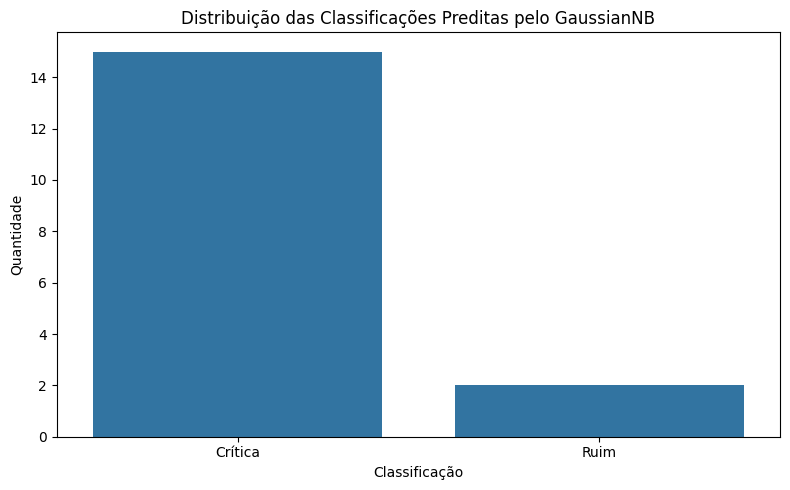

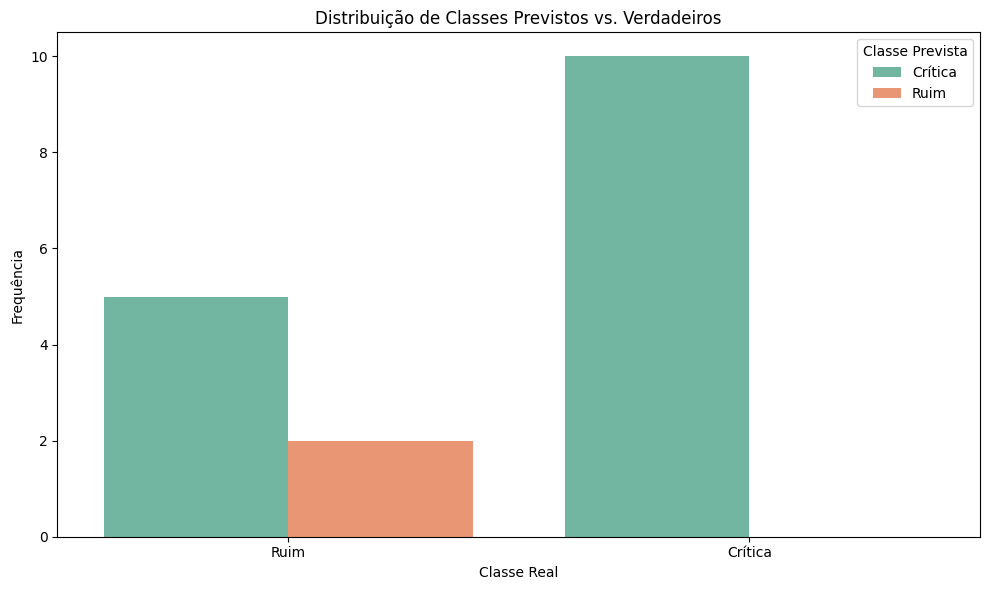

<ipython-input-46-a81360beb091>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test_q, palette='Set1')


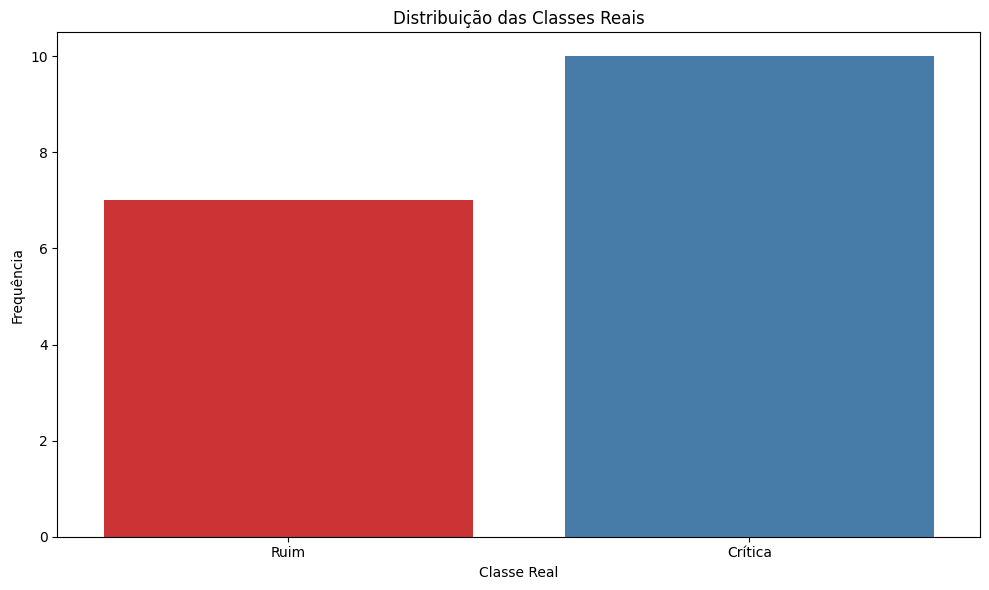

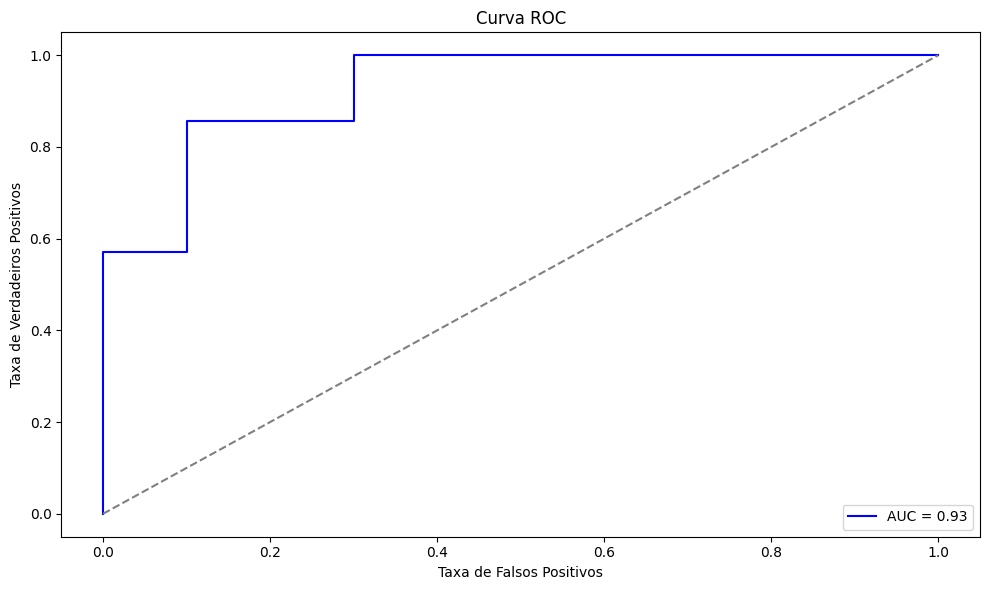

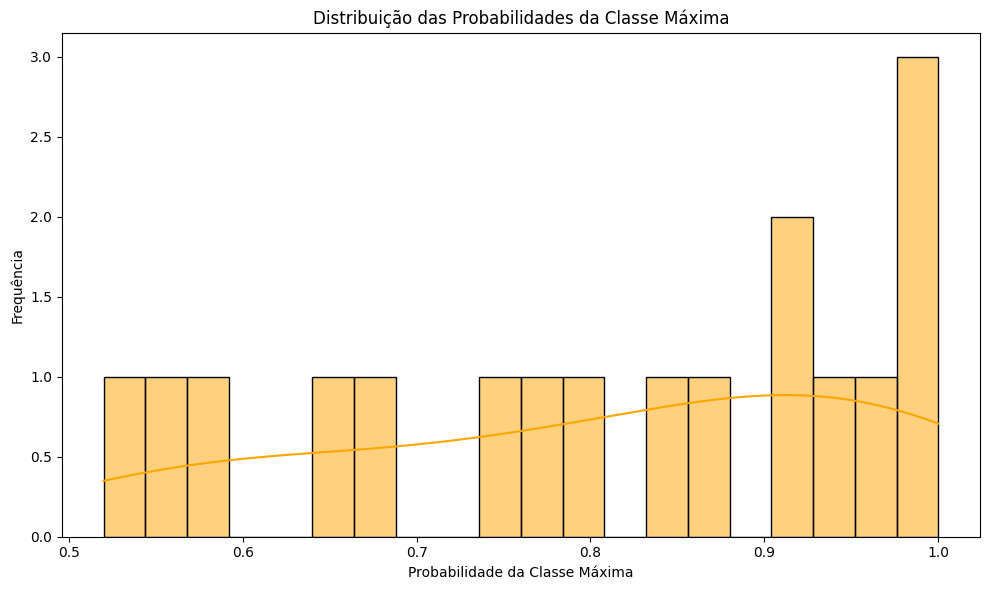

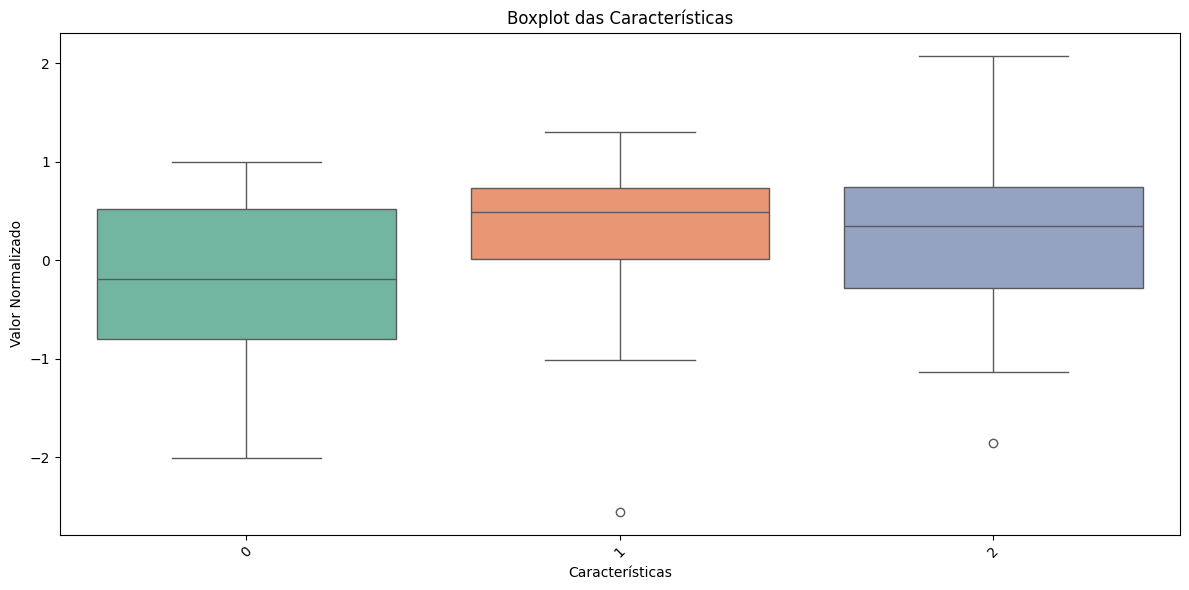

/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


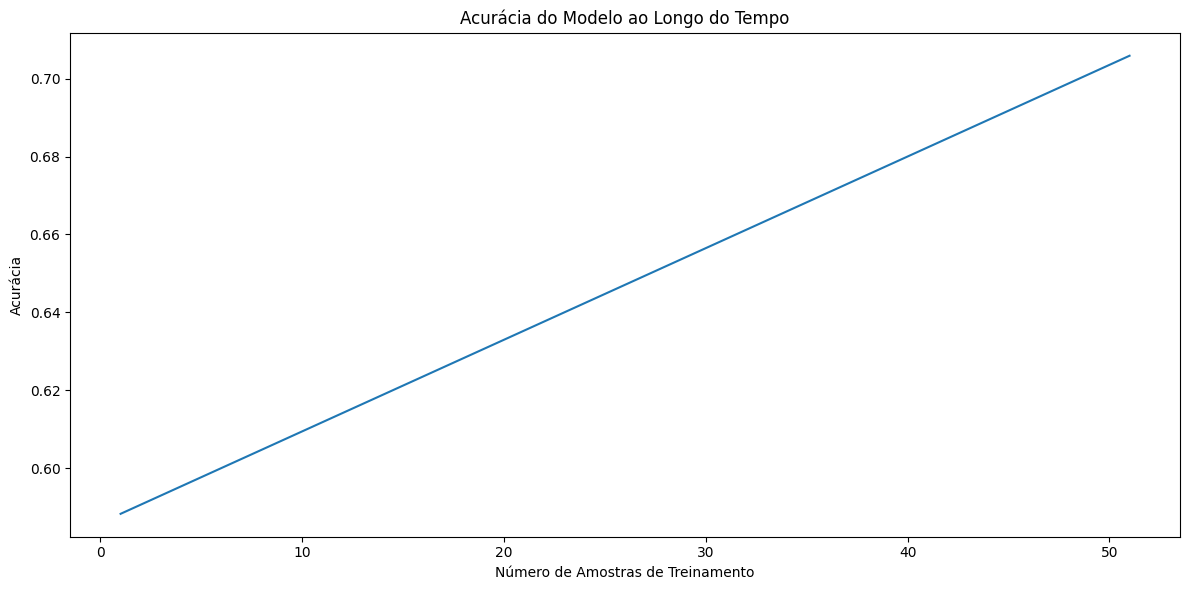

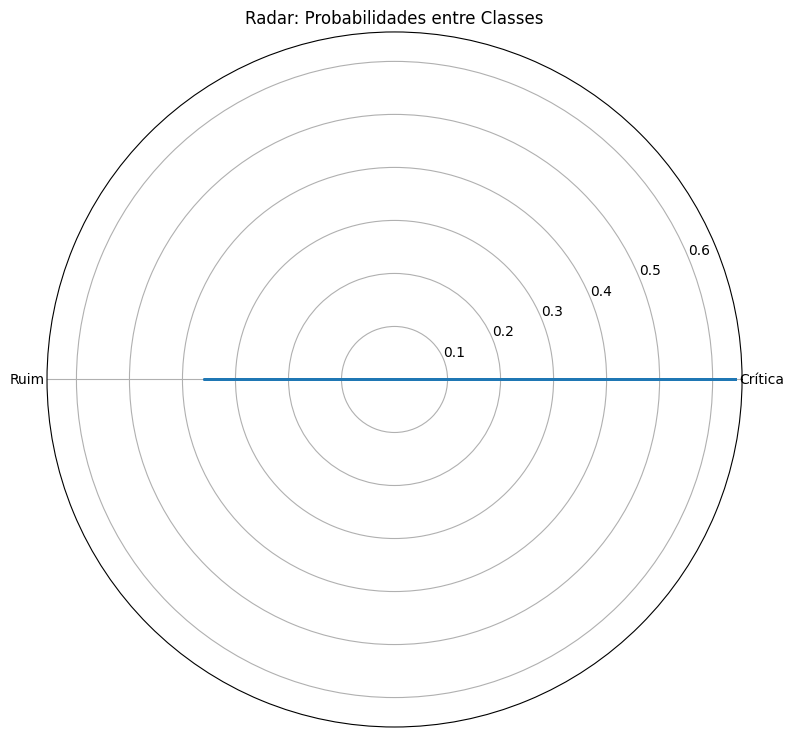

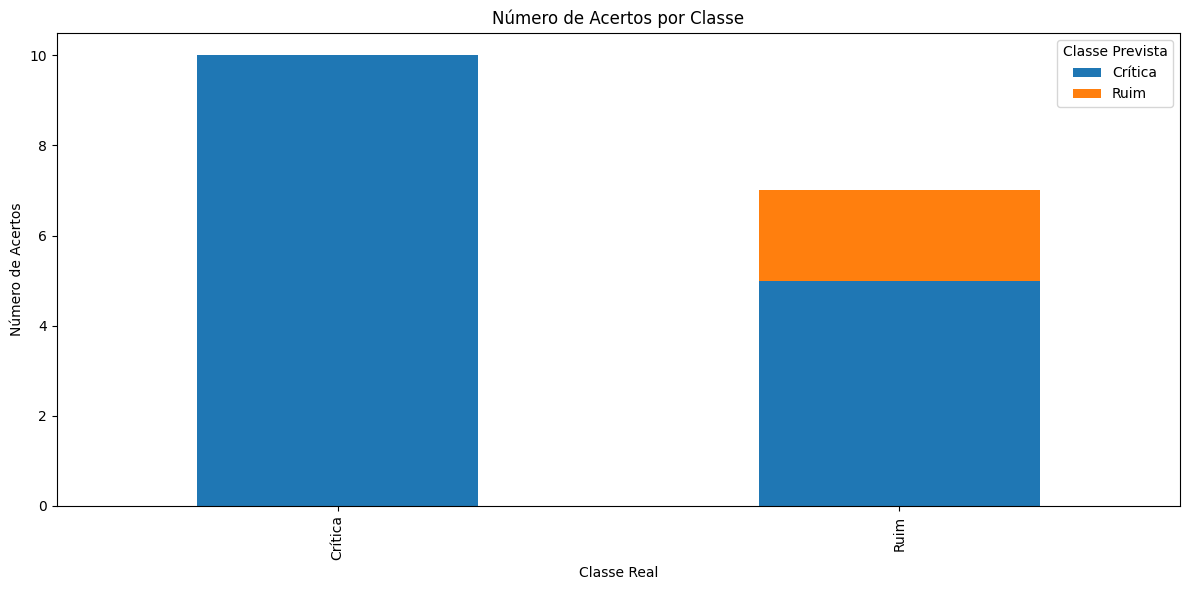

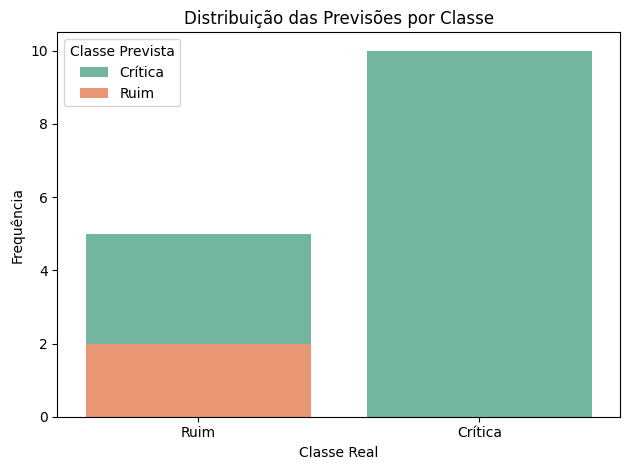

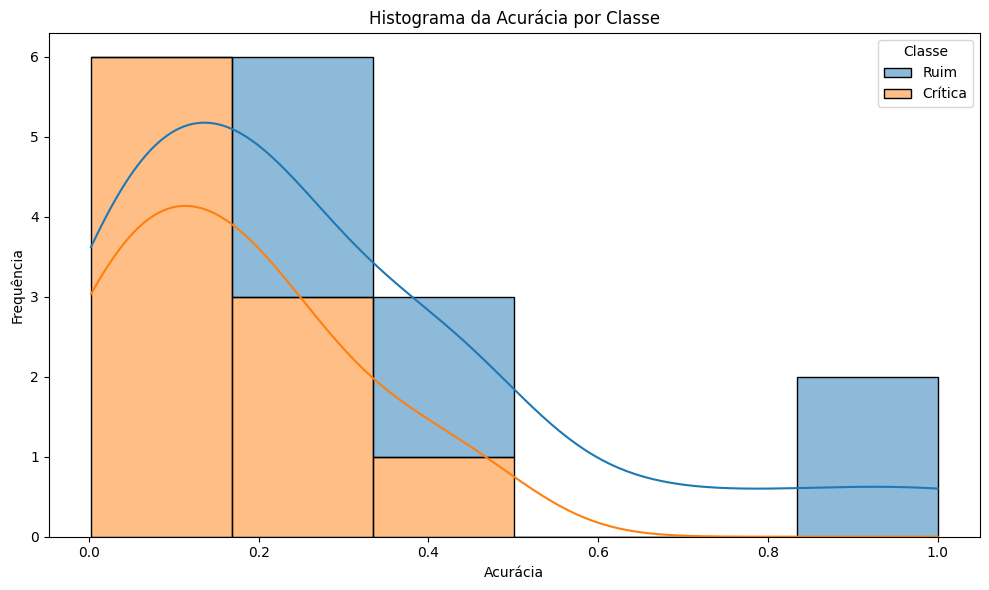

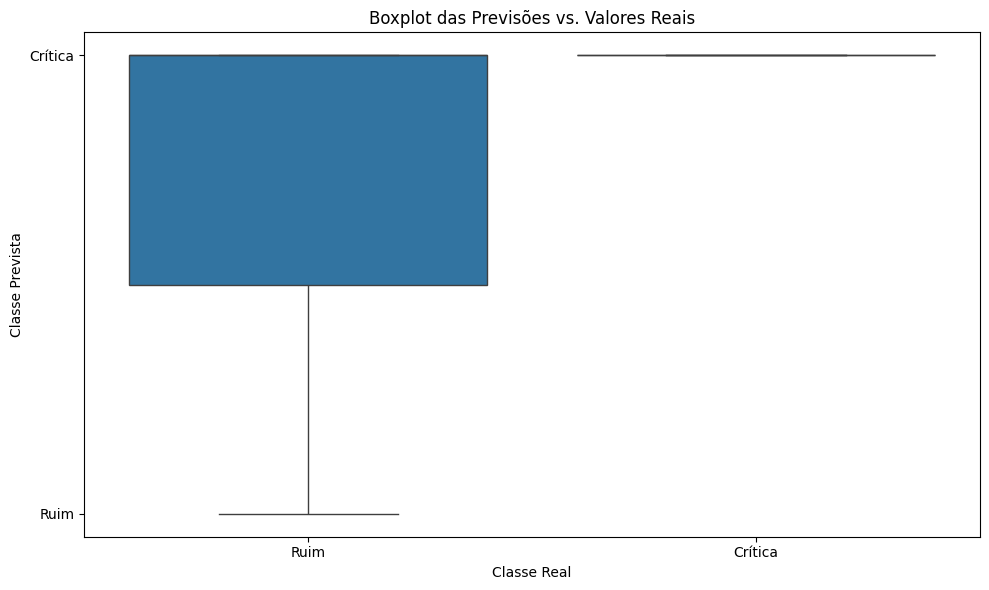

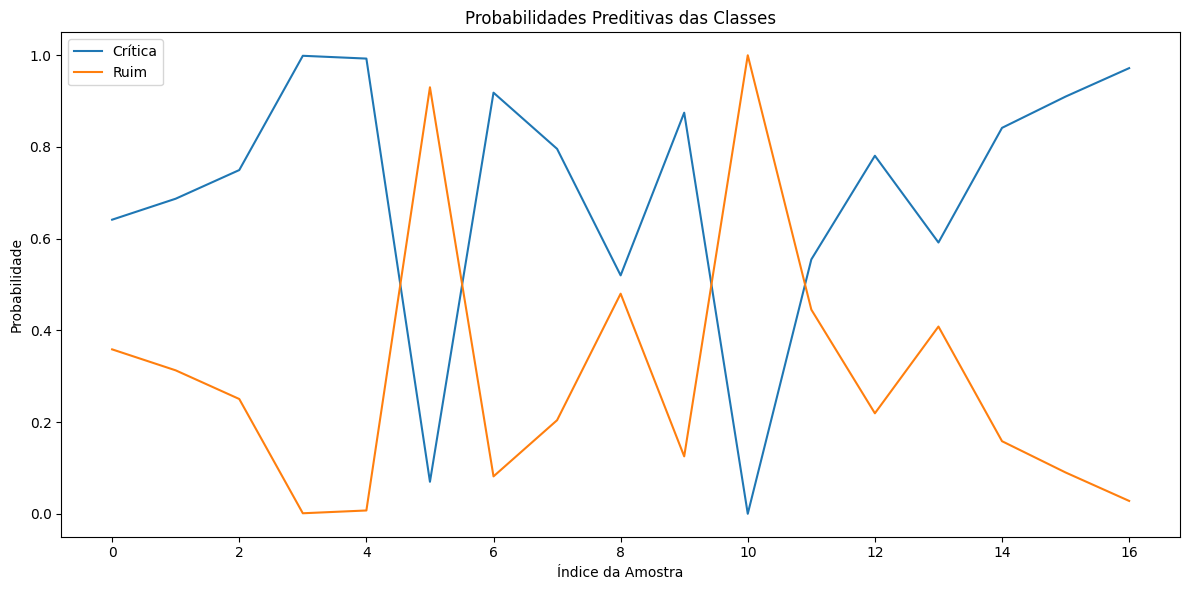

In [46]:
"""
Distribuição de Classificações Previstos pelo Modelo
Depois do treinamento, veja como o modelo distribui as classificações.
"""

# Contagem das classes previstas
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(8, 5))
sns.barplot(x=unique, y=counts)
plt.title('Distribuição das Classificações Preditas pelo GaussianNB')
plt.ylabel('Quantidade')
plt.xlabel('Classificação')
plt.tight_layout()
plt.show()

"""
Distribuição de Classes Previstos vs. Verdadeiros
Este gráfico compara as classes previstas com as reais para entender como o modelo se comporta em termos de acertos e erros.
"""
plt.figure(figsize=(10, 6))
sns.countplot(data=pd.DataFrame({'Real': y_test_q, 'Previsto': y_pred}), x='Real', hue='Previsto', palette='Set2')
plt.title('Distribuição de Classes Previstos vs. Verdadeiros')
plt.xlabel('Classe Real')
plt.ylabel('Frequência')
plt.legend(title='Classe Prevista')
plt.tight_layout()
plt.show()


"""
Gráfico de Barra - Frequência de Classes Reais
Esse gráfico mostra a distribuição de cada classe real na amostra de teste.
"""
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test_q, palette='Set1')
plt.title('Distribuição das Classes Reais')
plt.xlabel('Classe Real')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


"""
Curva ROC (Receiver Operating Characteristic)
A curva ROC é útil para avaliar a capacidade do modelo em distinguir entre as classes.
"""
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_q, nb_model.predict_proba(X_test_scaled_q)[:, 1], pos_label=nb_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


"""
Gráfico de Barras: Probabilidade da Classe Máxima
Aqui, mostramos a probabilidade da classe mais provável para cada amostra.
"""
max_prob = np.max(y_pred_proba, axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(max_prob, kde=True, bins=20, color='orange')
plt.title('Distribuição das Probabilidades da Classe Máxima')
plt.xlabel('Probabilidade da Classe Máxima')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


"""
Gráfico de Boxplot das Características
Isso ajudará a entender a distribuição dos dados em relação às diferentes características.
"""
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test_scaled_q, palette='Set2')
plt.title('Boxplot das Características')
plt.xlabel('Características')
plt.ylabel('Valor Normalizado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"""
Gráfico de Linha: Acurácia do Modelo ao Longo do Tempo (iterativo)
Este gráfico mostra como a acurácia do modelo muda com a adição de mais dados de treinamento ou ajustes do modelo.
"""
acuracia = []
for i in range(1, len(X_train_scaled_q), 50):
    X_train_iter = X_train_scaled_q[:i]
    y_train_iter = y_train_q[:i]
    nb_model.fit(X_train_iter, y_train_iter)
    acuracia.append(nb_model.score(X_test_scaled_q, y_test_q))

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(X_train_scaled_q), 50), acuracia)
plt.title('Acurácia do Modelo ao Longo do Tempo')
plt.xlabel('Número de Amostras de Treinamento')
plt.ylabel('Acurácia')
plt.tight_layout()
plt.show()

"""
Gráfico de Radar: Comparação das Probabilidades entre as Classes
Usado para comparar como as probabilidades variam entre as classes para uma determinada amostra.
"""
# Selecionar um subconjunto de classes e amostras
radar_data = pd.DataFrame(y_pred_proba[:5], columns=nb_model.classes_)
categories = list(radar_data.columns)
N = len(categories)

# Dados para o gráfico de radar
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
values = radar_data.iloc[0].values.flatten().tolist()
values += values[:1]

# Plot do gráfico de radar
plt.figure(figsize=(8, 8))
plt.polar(angles, values, label='Amostra 1', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.xticks(angles[:-1], categories)
plt.title('Radar: Probabilidades entre Classes')
plt.tight_layout()
plt.show()

"""
Gráfico de Barras: Número de Acertos por Classe
Este gráfico mostra quantas vezes o modelo acertou para cada classe.
"""
correct_classifications = pd.DataFrame({'Classe Real': y_test_q, 'Classe Prevista': y_pred})
class_count = correct_classifications.groupby(['Classe Real', 'Classe Prevista']).size().unstack(fill_value=0)
class_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Número de Acertos por Classe')
plt.xlabel('Classe Real')
plt.ylabel('Número de Acertos')
plt.tight_layout()
plt.show()

"""
Gráfico de Barras Empilhadas: Contagem de Previsões por Classe
Este gráfico empilhado mostra como o modelo prevê diferentes classes.
"""
predicted_df = pd.DataFrame({'Classe Real': y_test_q, 'Classe Prevista': y_pred})
sns.countplot(x='Classe Real', hue='Classe Prevista', data=predicted_df, palette='Set2', dodge=False)
plt.title('Distribuição das Previsões por Classe')
plt.xlabel('Classe Real')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

"""
Histograma da Acurácia por Classe
Este histograma mostra a distribuição da acurácia para cada classe.
"""
plt.figure(figsize=(10, 6))
sns.histplot(pd.DataFrame({'Classe': y_test_q, 'Acurácia': nb_model.predict_proba(X_test_scaled_q)[:, 1]}), x='Acurácia', hue='Classe', multiple='stack', kde=True)
plt.title('Histograma da Acurácia por Classe')
plt.xlabel('Acurácia')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

"""
Boxplot das Previsões vs. Valores Reais
Este boxplot ajuda a visualizar os valores reais contra as previsões feitas pelo modelo.
"""
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test_q, y=y_pred)
plt.title('Boxplot das Previsões vs. Valores Reais')
plt.xlabel('Classe Real')
plt.ylabel('Classe Prevista')
plt.tight_layout()
plt.show()

"""
Gráfico de Linha: Probabilidades Preditivas das Classes
Este gráfico mostra como as probabilidades de cada classe predita variam para uma amostra ao longo do tempo.
"""
predicted_probabilities = pd.DataFrame(y_pred_proba, columns=nb_model.classes_)
predicted_probabilities.plot(kind='line', figsize=(12, 6))
plt.title('Probabilidades Preditivas das Classes')
plt.xlabel('Índice da Amostra')
plt.ylabel('Probabilidade')
plt.tight_layout()
plt.show()


##